In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
%matplotlib inline

In [5]:
df=pd.read_csv('telecom_churn.csv')
# profile = ProfileReport(df, title="Diabetes Dataset Profiling Report", explorative=True)
# profile.to_file("diabetes_profile_report.html")

In [6]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


<Axes: xlabel='Churn', ylabel='count'>

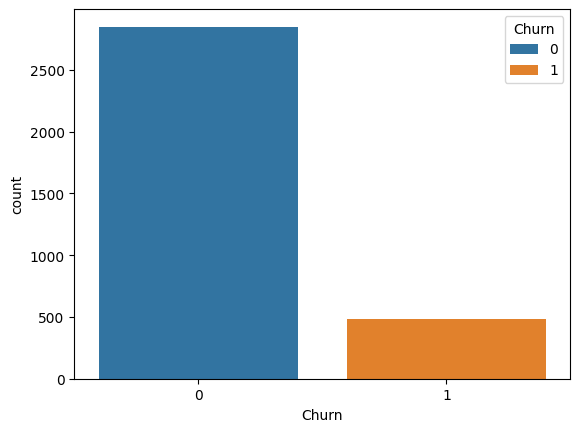

In [34]:
sns.countplot(x='Churn',data=df,hue='Churn')

In [8]:
y=df['Churn']
X=df.drop('Churn',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
model=LogisticRegression(max_iter=1000)

In [9]:
y_train.value_counts(),y_test.value_counts()

(Churn
 0    2280
 1     386
 Name: count, dtype: int64,
 Churn
 0    570
 1     97
 Name: count, dtype: int64)

In [10]:
X_train.dtypes

AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [11]:
X_train.shape,X_test.shape

((2666, 10), (667, 10))

In [12]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[[553  17]
 [ 80  17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       570
           1       0.50      0.18      0.26        97

    accuracy                           0.85       667
   macro avg       0.69      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



### UNDERSAMPLING

In [13]:
X_class_0=X_train[y_train==0]
X_class_1=X_train[y_train==1]
y_class_0=y_train[y_train==0]
y_class_1=y_train[y_train==1]
# df_class_0.shape , df_class_1.shape


In [14]:
count_class_0, count_class_1 = y_train.value_counts()
X_class_0_under=X_class_0.sample(count_class_1,random_state=42)
y_class_0_under=y_class_0.loc[X_class_0_under.index]
X_train_under=pd.concat([X_class_0_under,X_class_1],axis=0)
y_train_under=pd.concat([y_class_0_under,y_class_1],axis=0)
print("Random Under-sampling:")
y_train_under.value_counts()
# count_class_0 ,count_class_1
# print(df_test_under.columns[-1].value_counts())

Random Under-sampling:


Churn
0    386
1    386
Name: count, dtype: int64

In [15]:
model.fit(X_train_under,y_train_under)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[[432 138]
 [ 22  75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       570
           1       0.35      0.77      0.48        97

    accuracy                           0.76       667
   macro avg       0.65      0.77      0.66       667
weighted avg       0.86      0.76      0.79       667



### OVERSAMPLING

In [16]:
X_class_1_over=X_class_1.sample(count_class_0,random_state=42,replace=True)
y_class_1_over=y_class_1.loc[X_class_1_over.index]
X_train_over=pd.concat([X_class_1_over,X_class_0],axis=0)
y_train_over=pd.concat([y_class_1_over,y_class_0],axis=0)
print("Random Over-sampling:")
y_train_over.value_counts()

Random Over-sampling:


Churn
1    2280
0    2280
Name: count, dtype: int64

In [17]:
model.fit(X_train_over,y_train_over)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[[436 134]
 [ 26  71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       570
           1       0.35      0.73      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



### SMOTE

In [18]:
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

y_train_sm.value_counts()

Churn
0    2280
1    2280
Name: count, dtype: int64

In [19]:
model.fit(X_train_sm,y_train_sm)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[[445 125]
 [ 30  67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       570
           1       0.35      0.69      0.46        97

    accuracy                           0.77       667
   macro avg       0.64      0.74      0.66       667
weighted avg       0.85      0.77      0.80       667



### ENSEMBLE

In [20]:
y_train.value_counts()

Churn
0    2280
1     386
Name: count, dtype: int64

In [21]:
def get_train_batch(start, end):
    # y_class_emr=y_class_1.loc[X_class_em.index]
    X_class_0_mod=X_class_0[start:end]
    y_class_0_mod=y_class_0.loc[X_class_0_mod.index]
    y_train_en=pd.concat([y_class_0_mod,y_class_1],axis=0)
    X_train_en = pd.concat([X_class_0_mod, X_class_1], axis=0)
    # X_train_en = df_train.drop('Churn', axis='columns')
    # y_train_en = df_train.Churn
    return X_train_en, y_train_en

In [22]:
X_train1, y_train1 = get_train_batch( 0, 380)
model.fit(X_train1,y_train1)
y_pred1=model.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

[[433 137]
 [ 23  74]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       570
           1       0.35      0.76      0.48        97

    accuracy                           0.76       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.76      0.79       667



In [23]:
X_train2, y_train2 = get_train_batch(380,760)
model.fit(X_train2,y_train2)
y_pred2=model.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

[[430 140]
 [ 25  72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       570
           1       0.34      0.74      0.47        97

    accuracy                           0.75       667
   macro avg       0.64      0.75      0.65       667
weighted avg       0.86      0.75      0.78       667



In [24]:
X_train3, y_train3 = get_train_batch( 760, 1140)
model.fit(X_train3,y_train3)
y_pred3=model.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

[[423 147]
 [ 24  73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       570
           1       0.33      0.75      0.46        97

    accuracy                           0.74       667
   macro avg       0.64      0.75      0.65       667
weighted avg       0.86      0.74      0.78       667



In [25]:
X_train4, y_train4 = get_train_batch(1140,1520)
model.fit(X_train4,y_train4)
y_pred4=model.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred4))

[[417 153]
 [ 25  72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       570
           1       0.32      0.74      0.45        97

    accuracy                           0.73       667
   macro avg       0.63      0.74      0.64       667
weighted avg       0.85      0.73      0.77       667



In [26]:
X_train5, y_train5 = get_train_batch(1520,1900)
model.fit(X_train5,y_train5)
y_pred5=model.predict(X_test)
print(confusion_matrix(y_test, y_pred5))
print("\nClassification Report:")
print(classification_report(y_test, y_pred5))

[[428 142]
 [ 24  73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       570
           1       0.34      0.75      0.47        97

    accuracy                           0.75       667
   macro avg       0.64      0.75      0.65       667
weighted avg       0.86      0.75      0.78       667



In [27]:
X_train6, y_train6 = get_train_batch(1900,2280)
model.fit(X_train6,y_train6)
y_pred6=model.predict(X_test)
print(confusion_matrix(y_test, y_pred6))
print("\nClassification Report:")
print(classification_report(y_test, y_pred6))

[[429 141]
 [ 23  74]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       570
           1       0.34      0.76      0.47        97

    accuracy                           0.75       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.75      0.79       667



In [28]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]+ y_pred4[i] + y_pred5[i] + y_pred6[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [29]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       570
           1       0.32      0.77      0.46        97

    accuracy                           0.73       667
   macro avg       0.64      0.75      0.64       667
weighted avg       0.86      0.73      0.77       667



### TOMEK-LINKS

In [30]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)

In [31]:
model.fit(X_tl,y_tl)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[[550  20]
 [ 77  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.50      0.21      0.29        97

    accuracy                           0.85       667
   macro avg       0.69      0.59      0.61       667
weighted avg       0.82      0.85      0.83       667

